In [1]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_features=2, random_state=42, cluster_std=2, n_samples=500)

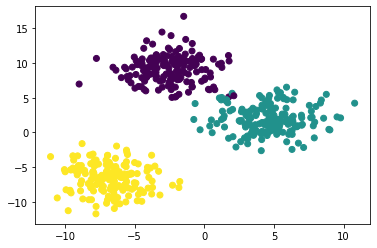

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(X[:, 0], X[:, 1], c=y);

In [4]:
from numpy import linalg as LA
from numpy import argmin
import random

def k_means(X, k):
    cluster = [[] for i in range(k)]
    centers = []
    
    while len(centers) != k:
        center = random.choice(X)
        # if center not in centers:
        centers.append(center)
            
    while True:
        current_cluster = [[] for i in range(k)]
        
        for elem in X:
            dist = []
            for c in centers:
                dist.append(LA.norm(elem, c))
                
            current_cluster[argmin(dist)].append(elem)
            
        if cluster == current_cluster:
            break
            
            
        # for cluster in clusters:
        #     sum(cluster)
    
    return cluster


In [5]:
k_means(X, 2)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()